In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

In [4]:
# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

file_name='Mall_Customers.csv'
# Load the dataset
df = pd.read_csv(f"../data/{file_name}")

In [6]:
# DATA INSPECTION
# See the first 5 rows
print("--- Data Head ---")
print(df.head())

# Get info on data types and missing values
print("\n--- Data Info ---")
df.info()

# Get statistical summary for numerical columns
print("\n--- Data Description ---")
print(df.describe())

# Check for duplicate rows
print(f"\nTotal duplicate rows: {df.duplicated().sum()}")

--- Data Head ---
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

--- Data Descripti

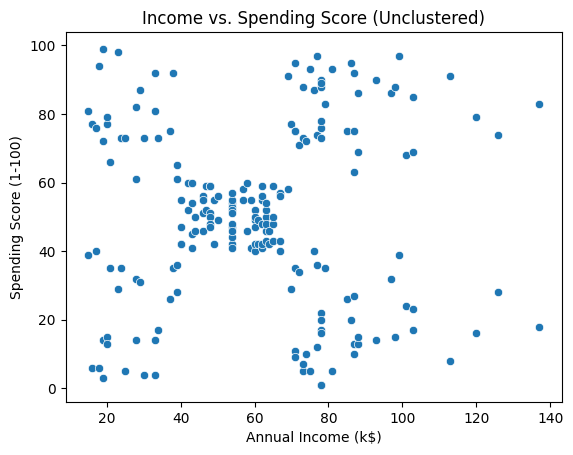

In [7]:
#Exploratory Data Analysis (EDA)
# Create a scatter plot of the two key features
sns.scatterplot(
    data=df, 
    x='Annual Income (k$)', 
    y='Spending Score (1-100)'
)
plt.title('Income vs. Spending Score (Unclustered)')
plt.show()

we can notice 5 groups (clusters), we'll try to identify using the K-Means algorithm.

K-Means works by measuring distance. Annual Income (15-137) and Spending Score (1-99) are on different scales. We must scale them, or the algorithm will be biased toward Annual Income. We will use the StandardScaler.

In [8]:
# Select the features we'll use for clustering
# .values turns the DataFrame into a NumPy array, which sklearn prefers
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

# X_scaled is now our clean, prepared data
print(X_scaled[:5]) # Show the first 5 scaled rows

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


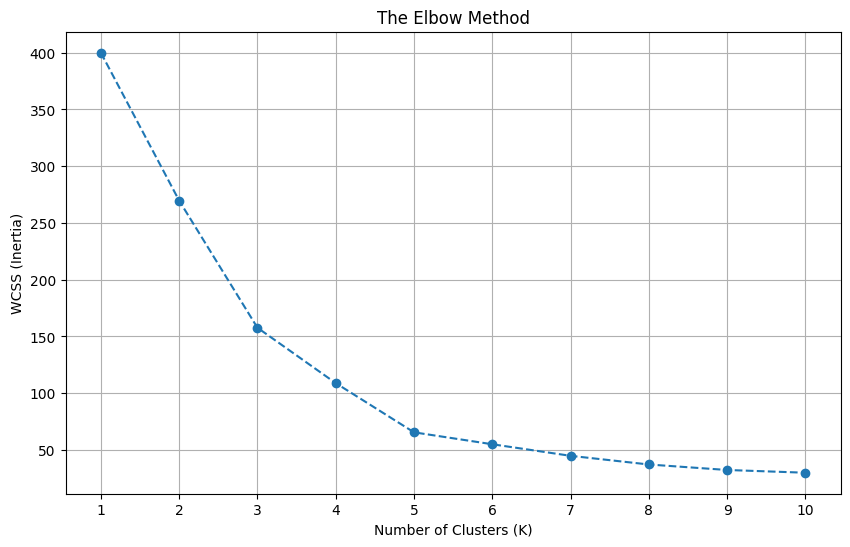

In [9]:
# Find the Optimal 'K' (The Elbow Method)
# Create an empty list to store the WCSS (inertia) for each K
wcss = []
k_range = range(1, 11) # Test K from 1 to 10

for k in k_range:
    # Create and fit the K-Means model
    kmeans = KMeans(
        n_clusters=k, 
        init='k-means++',  # A smart way to initialize centroids
        n_init=10,         # Run 10 times with different starting points
        random_state=42
    )
    kmeans.fit(X_scaled)
    
    # Add the WCSS (inertia) to our list
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

For this dataset, the bend is clearly at K=5.

In [10]:
# We've confirmed K=5 is the optimal number
OPTIMAL_K = 5

# Create the final K-Means model
kmeans = KMeans(
    n_clusters=OPTIMAL_K, 
    init='k-means++', 
    n_init=10, 
    random_state=42
)

# Fit the model and PREDICT the cluster for each customer
# .fit_predict() does both training and assigning labels in one step
y_kmeans_labels = kmeans.fit_predict(X_scaled)

# y_kmeans_labels is a NumPy array [0, 4, 0, 4, 0, 4, ...] 
# with the cluster number for each customer.
print(y_kmeans_labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


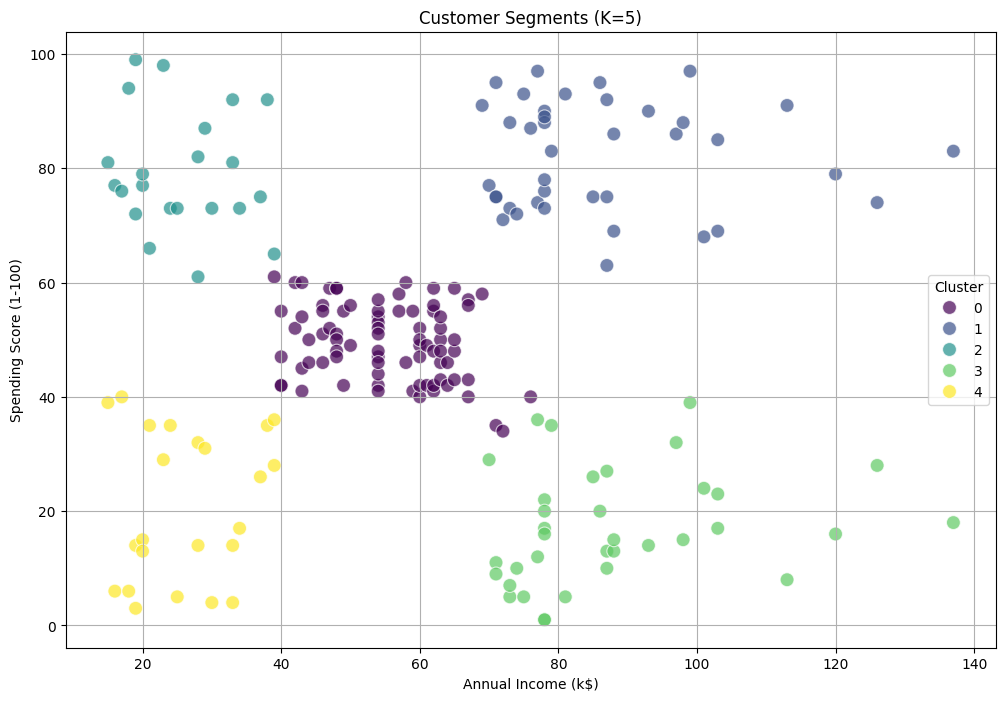

In [11]:
#Visualizing the clusters
# Add the new cluster labels as a column in our original DataFrame
df['Cluster'] = y_kmeans_labels

# Plot the final clustered data
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',  # Color the dots by their assigned cluster
    palette='viridis', # A nice color scheme
    s=100,          # Make the dots larger
    alpha=0.7,
    legend='full'
)
plt.title(f'Customer Segments (K={OPTIMAL_K})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [12]:
# Analyze the characteristics of each cluster
# We use groupby() to see the average values for each cluster
cluster_profile = df.groupby('Cluster')[
    ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
].mean()

print(cluster_profile)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


### Conclusion: Naming the Customer Segments

Based on this data, we can create five distinct "personas" for the mall's marketing team. This is the conclusion of our unsupervised learning.

#### Cluster 0: "Standard" (Average Customer)

   ***Profile***: This is the largest group. Their age, income, and spending are all right in the middle of the pack.

   ***Analysis***: They are the "average" customer. They don't have a strong defining feature, making them a general, mass-market audience.

#### Cluster 1: "Target" (High Income, High Spending)

   ***Profile***: This is the most valuable group. They are relatively young (~33), have the highest average income (86.5k), and the highest spending score (82.1).

   ***Analysis***: This is the mall's prime target for premium brands, loyalty programs, and exclusive offers.

#### Cluster 2: "Careless" (Low Income, High Spending)

***Profile***: This group is fascinating. They are the youngest (~25) and have the lowest income (25.7k), but they spend a lot (79.4).

***Analysis***: This segment is likely students or young professionals who are highly responsive to trends and sales, even if it's beyond their means. They are a good target for fast-fashion and "buy-now-pay-later" deals.

#### Cluster 3: "Careful" (High Income, Low Spending)

***Profile***: This group is the opposite of Cluster 1. They have the highest income (88.2k) but the lowest spending score (17.1).

***Analysis***: These are the "frugal rich." They visit the mall but are very hard to convince. They are a prime target for a different kind of marketing, perhaps focused on high-quality, long-lasting investments rather than impulse buys.

#### Cluster 4: "Sensible" (Low Income, Low Spending)

***Profile***: This group is older (~45), has a low income (26.3k), and a very low spending score (20.9).

***Analysis***: This segment is the most frugal. They are likely visiting the mall for essentials or window shopping. They would only respond to heavy discounts or basic necessities.